# Optimizing Online Learning: Analyzing Student Engagement and Performance in Digital Classrooms

### Objective 
To uncover critical patterns in online learning engagement, explore how student behavior influences course performance, and identify predictors of success (or dropout). This project focuses on demographic trends, engagement behavior, and course outcomes through an interactive Streamlit dashboard.

### Dataset Overview

Source: Kaggle

Name: Online Course Student Engagement Metrics
 https://www.kaggle.com/datasets/thedevastator/online-course-student-engagement-metrics/data

Size: 130,000+ student records

Key Features: Demographics, behavioral metrics, course interaction, forum activity, and certification outcomes

Use Cases: EDA, visualization, educational research, early intervention modeling, predictive analysis


### Tech Stack
- Pandas & NumPy: Data manipulation & wrangling

- Matplotlib & Seaborn: Visual storytelling

- Streamlit: Interactive dashboard creation

- Jupyter Notebook: Exploratory analysis workflow

## Intro to the Dataset & Library Setup

### 1.1 Import Necessary Libraries

In [1]:
# data manipulation/core libraries
import pandas as pd
import numpy as np 
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# dashboard 
import streamlit as st

Lays the foundation for data loading, exploration, and visual analysis.



### 1.2 Data Ingestion & Initial Exploration
- Understand the dataset's shape, schema, and descriptive statistics before cleaning or analysis.

In [2]:
df = pd.read_csv("../data/Courses.csv")

In [3]:
# Display the first few rows
df.head()

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,...,0,2012-12-19,2013-11-17,NaN,9.0,NaN,NaN,0,NaN,1.0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,...,0,2012-10-15,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,...,0,2013-02-08,2013-11-17,NaN,16.0,NaN,NaN,0,NaN,1.0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,...,0,2012-09-17,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,...,0,2012-12-19,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0


In [4]:
df['course_id'].value_counts()

course_id
HarvardX/CS50x/2012            169621
MITx/6.00x/2012_Fall            66731
MITx/6.00x/2013_Spring          57715
HarvardX/ER22x/2013_Spring      57406
HarvardX/PH207x/2012_Fall       41592
MITx/6.002x/2012_Fall           40811
HarvardX/PH278x/2013_Spring     39602
MITx/8.02x/2013_Spring          31048
HarvardX/CB22x/2013_Spring      30002
MITx/14.73x/2013_Spring         27870
MITx/6.002x/2013_Spring         22235
MITx/7.00x/2013_Spring          21009
MITx/3.091x/2012_Fall           14215
MITx/8.MReV/2013_Summer          9477
MITx/3.091x/2013_Spring          6139
MITx/2.01x/2013_Spring           5665
Name: count, dtype: int64

### Column Name	& Descriptions (Sourced from Kaggle)
- **course_id** The name of the course the student has enrolled in. (String)

- **userid_DI** The id of the student enrolled in the course (String)

- **registered**	Indicates whether a student has registered for a particular course or not. (Boolean)

- **viewed**	Indicates whether a student has viewed the course content after registration. (Boolean)

- **explored**	Indicates whether a student has explored the course content beyond just viewing. (Boolean)

- **certified**	Indicates whether a student has successfully completed and received a certificate for the course. (Boolean)

- **final_cc_cname_DI**	The country of the student. (String)

- **LoE_DI**	The level of education of the student. (String)

- **YoB	The year** of birth of the student. (Integer)

- **gender**	The gender of the student. (String)

- **grade**	The final grade of the student in the course. (Float)

- **start_time_DI**	The date when the student started the course. (Date)

- **last_event_DI**	The date of the last event the student participated in the course. (Date)

- **nevents**	The number of interactive actions a student had within the course. (Integer)

- **ndays_act**	The number of days a student was active in the course. (Integer)

- **nchapters**	The number of chapters a student interacted with in the course. (Integer)

- **nforum_posts**	The number of posts a student made on the course forum. (Integer)

- **roles**	The role of the user in the course (e.g., student, instructor, staff). (String)

- **incomplete_flag**	A flag indicating if there is any missing information in the student's record. (Boolean)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              641138 non-null  int64  
 1   course_id          641138 non-null  object 
 2   userid_DI          641138 non-null  object 
 3   registered         641138 non-null  int64  
 4   viewed             641138 non-null  int64  
 5   explored           641138 non-null  int64  
 6   certified          641138 non-null  int64  
 7   final_cc_cname_DI  641138 non-null  object 
 8   LoE_DI             535130 non-null  object 
 9   YoB                544533 non-null  float64
 10  gender             554332 non-null  object 
 11  grade              592766 non-null  object 
 12  start_time_DI      641138 non-null  object 
 13  last_event_DI      462184 non-null  object 
 14  nevents            441987 non-null  float64
 15  ndays_act          478395 non-null  float64
 16  np

There are 21 columns and several of them have missing values, such as year of birth, roles, incomplete flags, etc. 
1. Column 'grade' has float64 with some missing values — may affect analysis.
2. 'gender' contains nulls — may need to fill/drop depending on usage.
3. 'YoB' seems to have odd values (e.g. very young or very old entries).
4. Dates like 'start_time_DI' and 'last_event_DI' are objects — convert to datetime.
5. 'incomplete_flag' is int64 but may be binary — should be converted to bool.
6. Some categorical fields are still object types ('LoE_DI', 'final_cc_cname_DI') — check for encoding later.
7. Users are allowed to enroll in multiple courses indicated by repeated user id 

In [6]:
df.isnull().sum()

index                     0
course_id                 0
userid_DI                 0
registered                0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI               106008
YoB                   96605
gender                86806
grade                 48372
start_time_DI             0
last_event_DI        178954
nevents              199151
ndays_act            162743
nplay_video          457530
nchapters            258753
nforum_posts              0
roles                641138
incomplete_flag      540977
dtype: int64

Some columns that will not be useful for the performance dashboard are roles, incomplete_flag, userid_ID, and potentially course_id. 

In [7]:
df.describe()

,index,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
count,641138.000000,641138.0,641138.000000,641138.000000,641138.000000,544533.000000,441987.000000,478395.000000,183608.000000,382385.000000,641138.000000,0.0,100161.0
mean,320568.500000,1.0,0.624299,0.061899,0.027587,1985.253279,431.008018,5.710254,114.844173,3.634423,0.018968,NaN,1.0
std,185080.742781,0.0,0.484304,0.240973,0.163786,8.891814,1516.116057,11.866471,426.996844,4.490987,0.229539,NaN,0.0
min,0.000000,1.0,0.000000,0.000000,0.000000,1931.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,1.0
25%,160284.250000,1.0,0.000000,0.000000,0.000000,1982.000000,3.000000,1.000000,5.000000,1.000000,0.000000,NaN,1.0
50%,320568.500000,1.0,1.000000,0.000000,0.000000,1988.000000,24.000000,2.000000,18.000000,2.000000,0.000000,NaN,1.0
75%,480852.750000,1.0,1.000000,0.000000,0.000000,1991.000000,158.000000,4.000000,73.000000,4.000000,0.000000,NaN,1.0
max,641137.000000,1.0,1.000000,1.000000,1.000000,2013.000000,197757.000000,205.000000,98517.000000,48.000000,20.000000,NaN,1.0


### Key Takeaways from Descriptive Statistics:
High Registration, Sharp Drop-off in Engagement:

- 100% of users are registered, but only ~62% ever viewed content, ~6% explored further, and only ~2.7% earned a certificate — this sets up a great engagement funnel for the dashboard.

Activity Distribution is Extremely Skewed:

- Median nevents is 24, but the max is over 197,000. Similar trends in nplay_video and ndays_act — these long tails suggest we should use log scaling or percentile bins in visualizations.

Most Students Are in Their Late 20s to Early 30s:

- The average year of birth is ~1985, with 50% born between 1982 and 1991 — perfect for slicing by age group in demographic analysis.

Engagement is Shallow for Many Users:

- 75% of users interacted with ≤4 days, ≤4 chapters, and posted 0 times — this reinforces the drop-off challenge and could correlate with lack of certification.

Nearly All Users Have incomplete_flag = 1:

- Since this column has a constant value (1.0 for all 100,161 entries), it's uninformative and should likely be dropped in preprocessing.



In [8]:
df.shape

(641138, 21)

As previously mentioned, there are 21 columns and over six hundred thousand rows.

## Understand the Structure / Issues with the Dataset

### Columns to Investigate or Fix:

1. 'LoE_DI' (Level of Education) — 106,008 nulls (~15%). Could be informative for demographics; consider filling or flagging.
2. 'YoB' (Year of Birth) — 96,605 nulls. Check for outliers (e.g., YoB < 1930 or > 2010).
3. 'gender' — 86,806 nulls. Could be worth keeping for gender-based trends; may fill with 'Unknown' or drop if not significant.
4. 'grade' — 48,372 nulls. Important for performance tracking. Explore null distribution (e.g., not graded or dropped out?).
5. 'last_event_DI' — 178,954 nulls. May indicate no real engagement; possibly drop or flag.
6. 'nevents', 'ndays_act', 'nchapters' — lots of missing values, likely tied to user inactivity. Can fill with 0s or drop rows with all 3 missing.
7. 'roles' — 641,138 nulls (out of 641,138 total?) → all missing → DROP this column.
8. 'incomplete_flag' — 540,977 nulls. Very sparse. If it only flags rare issues, drop.

### Columns to Convert:

 - 'start_time_DI', 'last_event_DI' → convert to datetime
 - 'incomplete_flag' → convert to bool (if kept)
 - 'YoB' → convert to age (based on current year or course year)

### Columns to Drop:

drop_cols
- 'roles',             All missing
- 'incomplete_flag',   Very sparse, unclear meaning
- 'userid_DI',         Not useful for analysis
- 'course_id'          Optional: drop unless doing multi-course comparison



## Data Cleaning & Preprocessing

### 2.1 Handle Incorrect Data Types
- Convert columns to their correct data types.
- 'YoB' → convert to age (based on current year or course year) and 'start_time_DI', 'last_event_DI' → convert to datetime

In [9]:
# Convert 'YoB' to user current age based on course year

# Convert start_time_DI to datetime first (safe conversion)
df['start_time_DI'] = pd.to_datetime(df['start_time_DI'], errors='coerce')

# Extract course year and compute age
df['course_year'] = df['start_time_DI'].dt.year
df['age'] = df['course_year'] - df['YoB']

In [37]:
# Check
df['age'].value_counts()

age
21.0    38100
22.0    37814
23.0    37720
20.0    36329
24.0    35997
        ...  
5.0         5
9.0         5
79.0        5
81.0        1
6.0         1
Name: count, Length: 80, dtype: int64

In [10]:
# Convert 'start_time_DI' and 'last_event_DI' to datetime
# df['start_time_DI'] = pd.to_datetime(df['start_time_DI'], errors='coerce') (previously done above)
df['last_event_DI'] = pd.to_datetime(df['last_event_DI'], errors='coerce')


The errors='coerce' argument will safely turn any bad formats into NaT (missing date), which we can handle later.

### 2.2 Drop Unnecessary Columns

In [11]:
drop_cols = [
    'index',
    'roles',
    'incomplete_flag',
    'userid_DI'
]

# Drop Them 
df.drop(drop_cols, axis='columns', inplace=True)

In [38]:
# Check 

assert df.columns.all() not in drop_cols

### 2.25 Handle Missing Values (Started to Investigate Above by Dropping Irrelevant Columns)
#### Missing Value Strategy:
- `LoE_DI`: Fill with 'Unknown' — keeps it usable for filtering demographic trends.
- `gender`: Fill with 'Unknown' — useful for gender-based analysis.
- `YoB`: Keep since it helps validate `age` and uncover trends by generation.
- `grade`: Keep — null may imply dropout/no attempt. Flag as 'Not Graded'.
- `last_event_DI`: Keep — missing may mean zero engagement.
- `nevents`, `ndays_act`, `nchapters`: Fill missing with 0 — assumes inactivity.

In [17]:
# Fill missing level of education and gender with placeholder
df['LoE_DI'] = df['LoE_DI'].fillna('Unknown')
df['gender'] = df['gender'].fillna('Unknown')

# Flag missing grades as "Not Graded" (categorical alternative) or use -1 or create 'grade_status'
df['grade'] = pd.to_numeric(df['grade'], errors='coerce').fillna(-1)

# Fill engagement metrics with 0 (inactive students)
engagement_cols = ['nevents', 'ndays_act', 'nchapters']
df[engagement_cols] = df[engagement_cols].fillna(0)


In [39]:
# Check
df.isnull().sum()

course_id                 0
registered                0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI                    0
YoB                   96605
gender                    0
grade                     0
start_time_DI             0
last_event_DI        178954
nevents                   0
ndays_act                 0
nplay_video          457530
nchapters                 0
nforum_posts              0
course_year               0
age                   96605
was_active                0
duration_days        178954
grade_category            0
certified_str             0
dtype: int64

### 2.3 Normalize or Engineer Features
-  makes user engagement easier to interpret and visualize.
#### Feature Engineering
- Normalize engagement: min-max scale, log scale, or binning
- Create flag: Was the student active at all?
- Create duration column: time between first and last interaction


In [13]:
# Binary flag for any activity
df['was_active'] = (df['nevents'] > 0) | (df['ndays_act'] > 0) | (df['nchapters'] > 0)

# Duration of engagement
df['duration_days'] = (df['last_event_DI'] - df['start_time_DI']).dt.days


In [18]:
# Bin the Grade Column into Letter categories 
# Define a function to categorize grades
def grade_category(g):
    if g < 0:
        return 'Not Graded'
    elif g >= 0.9:
        return 'A'
    elif g >= 0.8:
        return 'B'
    elif g >= 0.7:
        return 'C'
    elif g >= 0.6:
        return 'D'
    else:
        return 'F'


In [19]:
# Apply the function to the grade column
df['grade_category'] = df['grade'].apply(grade_category)

In [ ]:
# Check
df['grade_category'].value_counts()

grade_category
F             566472
Not Graded     57400
A               7112
B               4498
C               2994
D               2662
Name: count, dtype: int64

### 2.4 (Optional) Categorize Age or Course Year for Data Visualization
- helps uncover group-level trends that are otherwise lost in raw ages.
- For a dashboard, binned age and activity flags allow better filtering and aggregations.

In [ ]:
# Optional: Create age groups
age_bins = [0, 18, 25, 35, 50, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-49', '50-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


### 2.5 Summary of Columns to Keep for Dashboard
Category            & Column Names
- Demographics      : gender, LoE_DI, age, age_group, final_cc_cname_DI
- Performance       :grade, certified, viewed, explored, registered
- Engagement        :nevents, ndays_act, nchapters, duration_days, was_active
- Course Info       : course_id, start_time_DI, last_event_DI, course_year

## Univariate Analysis

### 3.1 Age Distribution
- Understand the age distribution of the users

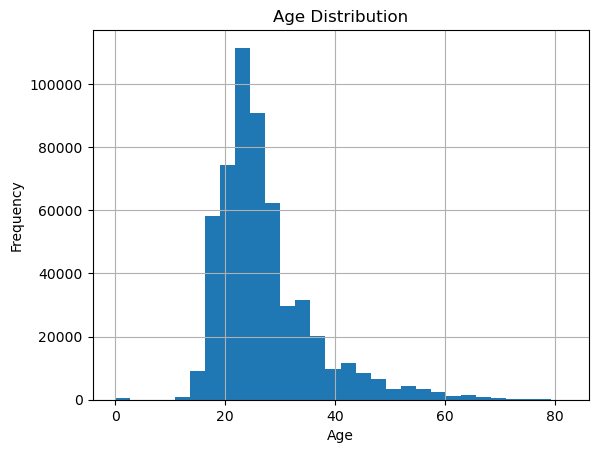

In [ ]:
df['age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Most users are between 20 and 40 years old, with fewer older learners enrolling.

### 3.2 Certification Status Distribution
- See how many users got certified vs not

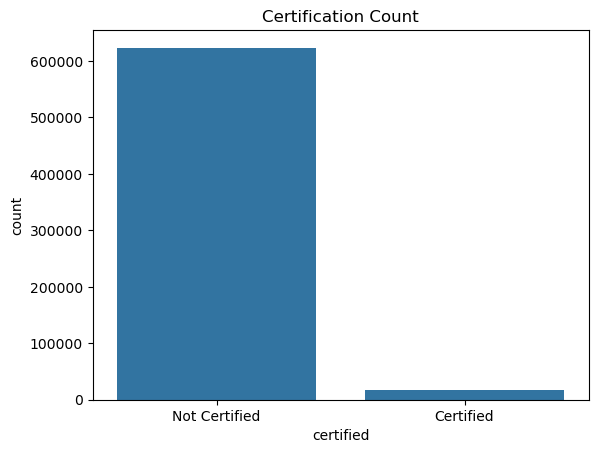

In [ ]:
sns.countplot(x='certified', data=df)
plt.title('Certification Count')
plt.xticks([0, 1], ['Not Certified', 'Certified'])
plt.show()

The majority of users (over 600,000) do not earn certifications, while fewer than 100,000 users get certified.

### 3.3 Level of Education
- Explore educational background of users

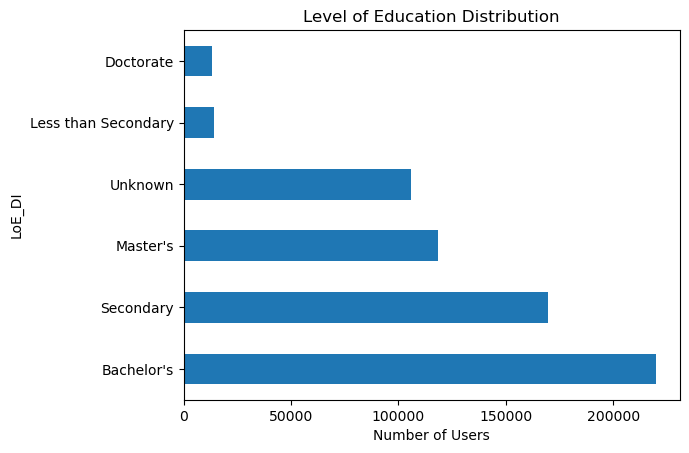

In [ ]:
df['LoE_DI'].value_counts().plot(kind='barh')
plt.title('Level of Education Distribution')
plt.xlabel('Number of Users')
plt.show()

Most learners have a bachelor's degree or some secondary education; education level alone doesn’t strongly predict certification.

## Bivariate Exploration

### 4.1 Certification by Gender
- Compare certification rates across genders

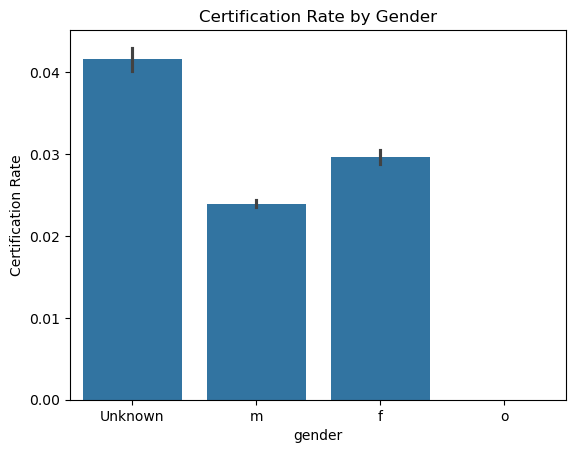

In [ ]:
sns.barplot(x='gender', y='certified', data=df)
plt.title('Certification Rate by Gender')
plt.ylabel('Certification Rate')
plt.show()


Certification rates are low across all genders, but females have a slightly higher rate (0.03) than males (0.025), with many users’ gender marked as unknown (certification rate 0.04).

### 4.2 Activity vs Grade
- Is user engagement linked with performance?

In [30]:
df['certified_str'] = df['certified'].astype(str)


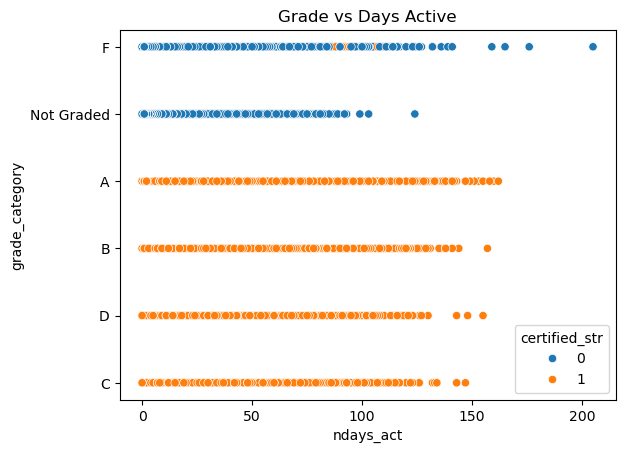

In [31]:

fig, ax = plt.subplots()
sns.scatterplot(data=df, x='ndays_act', y='grade_category', hue='certified_str', ax=ax)
plt.title("Grade vs Days Active")
plt.show() 


Students with more active days generally achieved higher grades, suggesting consistent participation is linked to better performance.



### 4.3 Education vs Certification
- How does education level impact certification?

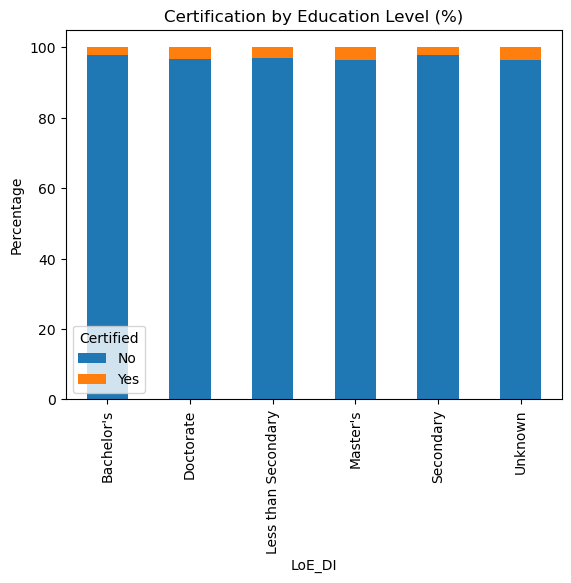

In [ ]:
edu_cert = pd.crosstab(df['LoE_DI'], df['certified'], normalize='index') * 100
edu_cert.plot(kind='bar', stacked=True)
plt.title('Certification by Education Level (%)')
plt.ylabel('Percentage')
plt.legend(title='Certified', labels=['No', 'Yes'])
plt.show()

Users with master’s degrees have a relatively higher chance of certification, but most users—regardless of education—remain uncertified.

## Multivariate Exploration


### 5.1 Certification by Gender & Age Group

/var/folders/dk/8dthhr9172s4n0zhm0p_7vjc0000gn/T/ipykernel_49411/47762814.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cert_demo = df.groupby(['gender', 'age_group'])['certified'].mean().unstack()


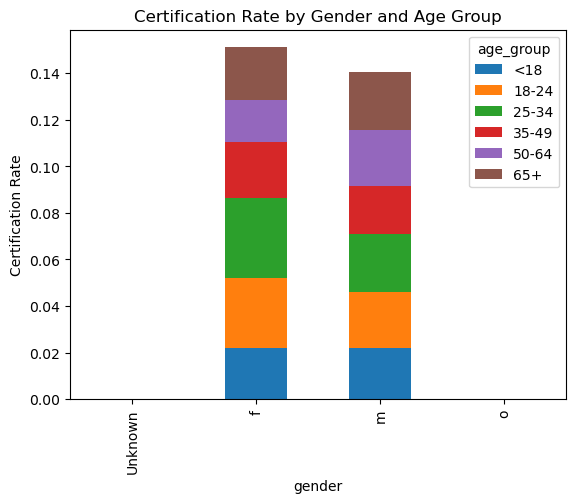

In [ ]:
cert_demo = df.groupby(['gender', 'age_group'])['certified'].mean().unstack()
cert_demo.plot(kind='bar', stacked=True)
plt.title('Certification Rate by Gender and Age Group')
plt.ylabel('Certification Rate')
plt.show()

 Females aged 25–34 are most likely to get certified; among males, those aged 65+ have a surprisingly higher rate.

### 5.2 Engagement vs Grade Colored by Certification

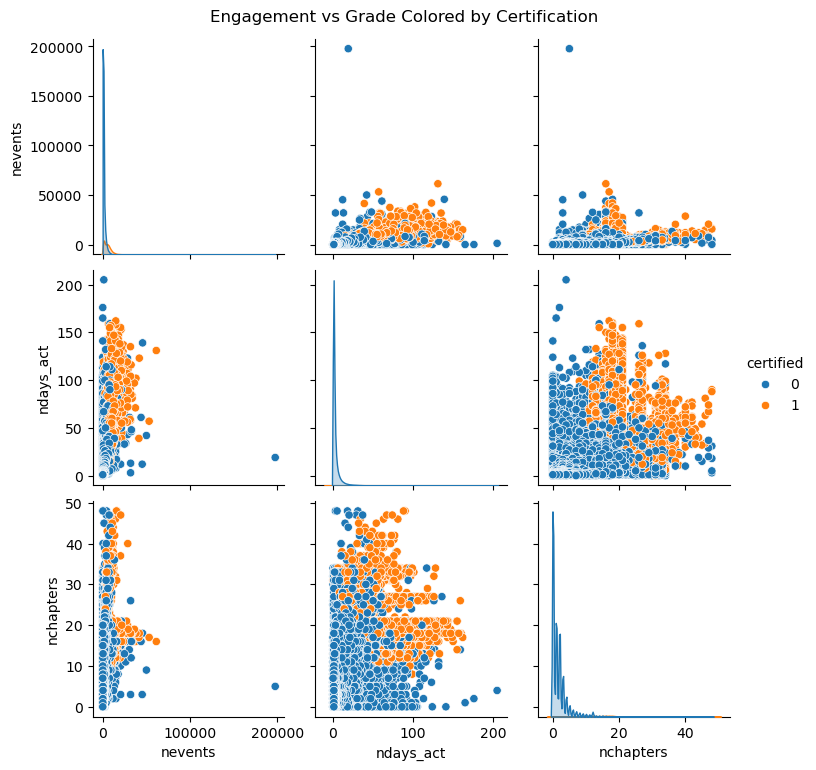

In [ ]:
sns.pairplot(df[['grade', 'nevents', 'ndays_act', 'nchapters', 'certified']], hue='certified')
plt.suptitle('Engagement vs Grade Colored by Certification', y=1.02)
plt.show()


Certified users tend to have higher grades and more engagement (e.g., events, chapters, and active days) compared to non-certified users, showing a positive relationship between effort and course completion.

## Engagement Funnel

### 6.1 Funnel Conversion Visual

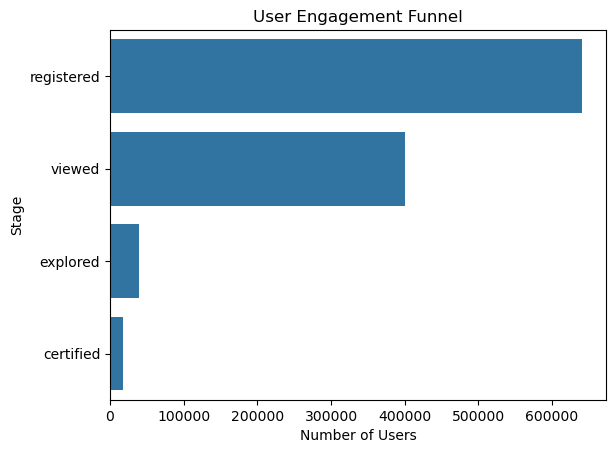

In [ ]:
stages = ['registered', 'viewed', 'explored', 'certified']
funnel_counts = [df[col].sum() for col in stages]
funnel_df = pd.DataFrame({'stage': stages, 'count': funnel_counts})
sns.barplot(x='count', y='stage', data=funnel_df)
plt.title('User Engagement Funnel')
plt.xlabel('Number of Users')
plt.ylabel('Stage')
plt.show()

 Out of over 600k registered users, fewer than 50k complete and earn certificates, though over 400k view course materials.

## Geographic & Demographic Trends

### 7.1 Country vs Certification

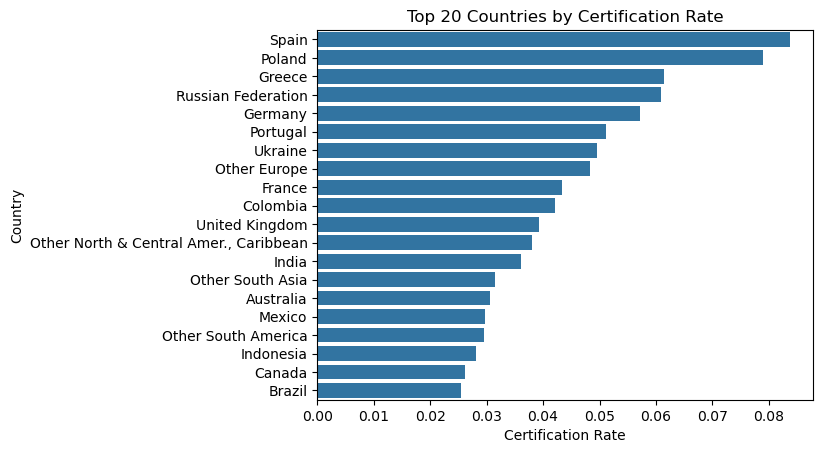

In [ ]:
country_cert = df.groupby('final_cc_cname_DI')['certified'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=country_cert.values, y=country_cert.index)
plt.title('Top 20 Countries by Certification Rate')
plt.xlabel('Certification Rate')
plt.ylabel('Country')
plt.show()

Spain, Poland, and Greece show the highest certification rates, while Brazil has the lowest.

### 7.2 Statistical T-test

In [33]:
from scipy.stats import ttest_ind

# Separate the grades
certified_grades = df[df['certified'] == 1]['grade'].dropna()
non_certified_grades = df[df['certified'] == 0]['grade'].dropna()

# Run t-test
t_stat, p_val = ttest_ind(certified_grades, non_certified_grades, equal_var=False)

# Display result
print(f"T-test result: t = {t_stat:.3f}, p = {p_val:.3f}")
if p_val < 0.05:
    print("✅ Statistically significant difference in grades between certified and non-certified users.")
else:
    print("ℹ️ No statistically significant difference in grades.")


T-test result: t = 874.650, p = 0.000
✅ Statistically significant difference in grades between certified and non-certified users.


There is a clear and statistically significant difference in average grades between users who earned a certificate and those who didn’t. This means certification is strongly associated with higher grades.

## Time-Based Behavior
### 8.1 Duration of Activity

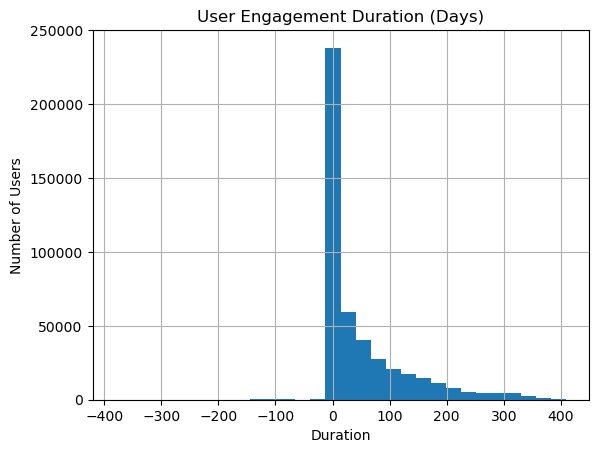

In [ ]:
# Calculated as: (last_event_DI - start_time_DI)
df['duration_days'] = (df['last_event_DI'] - df['start_time_DI']).dt.days
df['duration_days'].dropna().hist(bins=30)
plt.title('User Engagement Duration (Days)')
plt.xlabel('Duration')
plt.ylabel('Number of Users')
plt.show()


Most users have zero active days, indicating drop-off after registration; negative values may indicate incorrect date data or data entry issues.

### 8.2 Start Day vs Activity 
- Useful to see if start day influences engagement

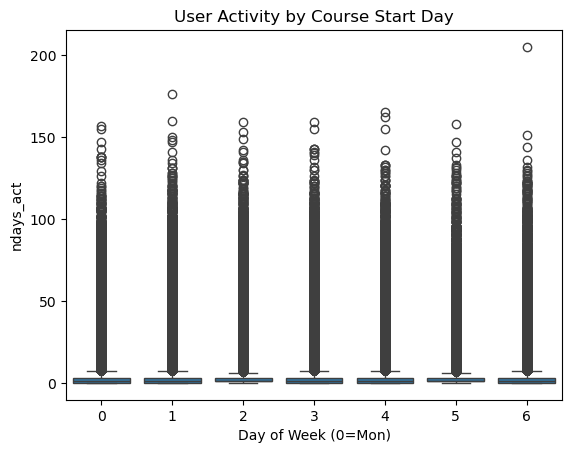

In [ ]:
df['start_day'] = df['start_time_DI'].dt.dayofweek
sns.boxplot(x='start_day', y='ndays_act', data=df)
plt.title('User Activity by Course Start Day')
plt.xlabel('Day of Week (0=Mon)')
plt.show()

User activity appears to vary by the day the course was started, with certain start days showing higher engagement, possibly due to weekly schedules or motivation patterns.

In [41]:
# Save Data for Streamlit Dashboard
df.to_csv("cleaned_data.csv", index=False)

## Analysis & Results

The univariate analysis reveals that most users are between 20 and 40 years old, with a noticeable decline in participation from older age groups. Education levels play a role in participation, as most users have a bachelor's degree or some form of secondary education; however, education alone does not strongly predict whether a user earns a certification. The certification rate is low, with over 600,000 users enrolled but fewer than 100,000 achieving certification. Certification rates appear to be low across all genders, but females have a slightly higher certification rate (0.03) than males (0.025). Many users have an unknown gender, with a certification rate of 0.04. Engaging in the course more actively (e.g., attending events, chapters, and logging active days) is positively correlated with better grades and a higher likelihood of certification, with master’s degree holders showing a relatively higher chance of certification.

Bivariate analysis reveals that the relationship between engagement and performance is significant. Students who engage more frequently—through attending events, logging active days, and exploring course materials—tend to achieve higher grades. Additionally, females aged 25–34 are most likely to get certified, while males over 65 years old show a surprising spike in certification rates. Despite these patterns, most users remain uncertified. Multivariate analysis confirms that users who actively engage in the course tend to have higher grades and are more likely to achieve certification. Regional differences also emerge, with countries like Spain, Poland, and Greece showing the highest certification rates, while Brazil has the lowest. Certification correlates with higher grades, and this relationship is statistically significant, suggesting that the effort and commitment required for certification lead to better academic outcomes. Overall, user activity shows significant drop-off after initial registration, with a notable portion of users remaining inactive.


### Recommendations 
- Implement targeted interventions to re-engage users who have registered but are inactive, potentially through reminder notifications or personalized support.

- Provide additional resources and incentives for users to complete certifications, especially for those with higher engagement metrics, to boost completion rates.

- Develop gender- and age-specific campaigns to encourage underrepresented groups in certification, particularly among older males and younger females.

- Offer certification incentives in the form of rewards or recognition that could appeal to users, such as digital badges or future course discounts.

- Investigate the data entry issues that result in negative or zero activity values and clean the data to improve its reliability for analysis.

#### Conclusion

The analysis highlights a stark contrast between user engagement and certification completion, with a large number of users failing to complete courses or earn certifications despite active participation. Higher engagement levels, such as increased active days and event attendance, are linked with better academic outcomes, particularly in females aged 25–34 and older males aged 65 and above. Regionally, Spain, Poland, and Greece exhibit the highest certification rates, offering potential insights into geographical factors that could be leveraged for future initiatives. However, there is a clear need to address user inactivity and drop-off rates to enhance overall engagement and certification completion.


#### Additional Insights 
- Engagement patterns appear to vary depending on the day courses are started, suggesting that external factors like weekly routines or motivational patterns may influence participation.

- Data discrepancies, such as negative values for user activity, should be addressed to ensure the integrity of future analyses and improve data-driven decision-making.

- The surprisingly high certification rates among older males warrant further investigation to uncover any cultural or regional factors that might contribute to this trend.


#### Overall Strategic Enhancements
- Develop targeted campaigns to increase engagement among users who are on the verge of dropping off, particularly those with minimal active days.

- Enhance support for certification by creating additional engagement-focused materials or incentive programs.

- Focus on regions with lower certification rates (e.g., Brazil) to understand and address potential barriers to course completion and certification.

### Next Steps

1. Implement Retention Campaigns: Design A/B tests around engagement nudges and track impact on activity and grades.

2. Build a Predictive Model: Use engagement features to predict likelihood of certification and intervene early.

3. Launch Weekly Cohorts: Test new course release structures to observe how start day affects overall performance and completion.

## Non-Technical Summary
Most users are between 20 and 40 years old, but fewer older learners enroll. Over 600,000 users register for courses, but fewer than 100,000 earn certifications. Certification rates are low, with females showing a slightly higher certification rate than males. Users who are more active in the course tend to perform better, and those with higher levels of education, such as master's degrees, are more likely to be certified. Regional differences also impact certification rates, with Spain, Poland, and Greece performing the best, while Brazil lags behind. The main takeaway is that consistent engagement is key to improving outcomes.

## Technical Summary
The univariate analysis indicates that most users are aged 20–40, with a larger portion holding a bachelor's degree or secondary education. Certification completion is low, with engagement metrics such as active days, events, and chapters correlating positively with higher grades and certification likelihood. Bivariate analysis reveals that females aged 25–34 and older males (65+) are more likely to be certified. Multivariate analysis suggests higher engagement is strongly associated with better academic performance and certification, with significant regional variations, particularly in Spain, Poland, and Greece. Data integrity issues, such as negative activity values, must be addressed.
